In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from wordcloud import WordCloud
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
import gc


import joblib

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **READ DataSet and preprocess**

In [2]:
DataSet = pd.read_csv("Symptom2Disease (1).csv",index_col=0)
# DataSet = DataSet.drop('Unnamed: 0', axis=1)
DataSet.head(10)

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."
5,Psoriasis,The skin on my palms and soles is thickened an...
6,Psoriasis,"The skin around my mouth, nose, and eyes is re..."
7,Psoriasis,My skin is very sensitive and reacts easily to...
8,Psoriasis,I have noticed a sudden peeling of skin at dif...
9,Psoriasis,The skin on my genitals is red and inflamed. I...


In [3]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1200 non-null   object
 1   text    1200 non-null   object
dtypes: object(2)
memory usage: 28.1+ KB


In [4]:
DataSet.shape

(1200, 2)

In [5]:
DataSet.isnull().sum() 

label    0
text     0
dtype: int64

In [6]:
DataSet.duplicated().sum()

np.int64(47)

In [3]:
DataSet[DataSet.duplicated()]

,label,text
163,Chicken pox,I'm feeling fatigued and have no energy. I can...
87,Common Cold,I've been quite exhausted and ill. My throat h...
130,Pneumonia,"I have a really high fever, and I have problem..."
133,Pneumonia,I'm having a hard time breathing and I feel re...
138,Pneumonia,"Lately I've been experiencing chills, fatigue,..."
169,Dimorphic Hemorrhoids,I've been constipated and it's really hard to ...
170,Dimorphic Hemorrhoids,"Since I've been constipated, using the restroo..."
171,Dimorphic Hemorrhoids,I've been constipated and it's really hard to ...
187,Dimorphic Hemorrhoids,Lately I've been experiencing constipation and...
189,Dimorphic Hemorrhoids,I've recently been suffering from constipation...


In [4]:
pd.DataFrame({"Number of Dublicates ":DataSet.duplicated().sum()},index=[''])

,Number of Dublicates
,47


In [5]:
DataSet = DataSet.drop_duplicates()

In [6]:
print("Number of Dublicates : " , DataSet.duplicated().sum())

Number of Dublicates :  0


In [7]:
DataSet.shape

(1153, 2)

In [8]:
DataSet['label'].unique()

array(['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox',
       'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
       'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne',
       'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Jaundice', 'Malaria',
       'urinary tract infection', 'allergy',
       'gastroesophageal reflux disease', 'drug reaction',
       'peptic ulcer disease', 'diabetes'], dtype=object)

# **visulization**

C:\Users\CS\AppData\Local\Temp\ipykernel_23412\4159439931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.countplot(x='label',data=DataSet ,  palette=colors)


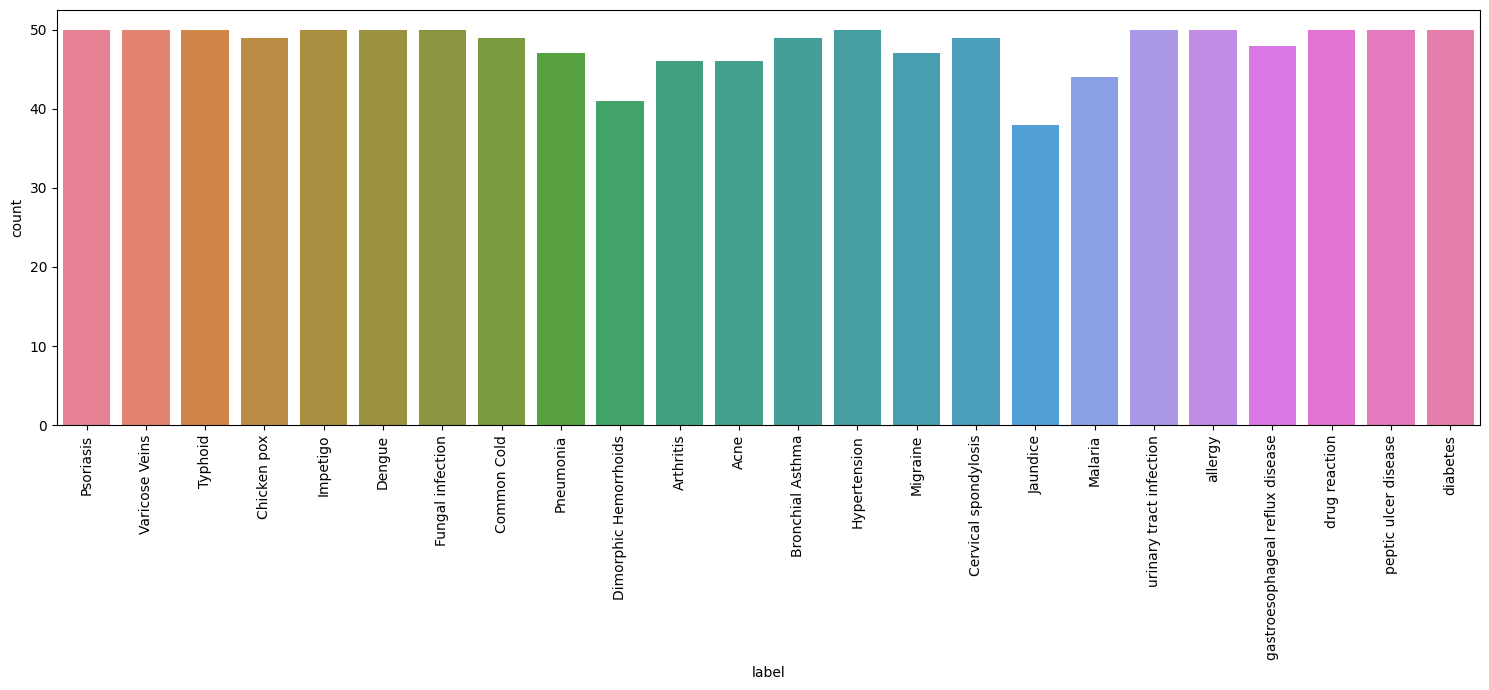

In [9]:

colors = sns.color_palette('husl', len(DataSet['label'].unique()))
plt.figure(figsize=(15,7))
fig = sns.countplot(x='label',data=DataSet ,  palette=colors)
plt.xticks(rotation=90,)
plt.tight_layout()
plt.show(fig)
plt.close('all')
del fig
gc.collect();

# **preprocessing**

In [10]:

#preprocessing functions

def remove_digits(text):
    pattern = r'[^a-zA-Z.,!?/:;\"\'\s]'
    return re.sub(pattern, '', text)


def remove_special_characters(text):
    pat = r'[^a-zA-Z0-9.,!?/:;\"\'\s]'
    return re.sub(pat, '', text)

def non_ascii(s):
  return "".join(i for i in s if ord(i)<128)

def removeStopWords(text):
    StopWords = set(stopwords.words("english"))
    StopWords.update(('and', 'I', 'A', 'http', 'And', 'So', 'arnt', 'This',
                            'When', 'It', 'many', 'Many', 'so', 'cant', 'Yes', 
                            'yes', 'No', 'no', 'These', 'these', 'mailto', 'regards',
                            'ayanna', 'like', 'email'))
    return ' '.join([word for word in text.split() if word not in StopWords])


def punct(text):
    token = RegexpTokenizer(r'\w+')
    text = token.tokenize(text)
    return " ".join(text)

def lower(text):
    return text.lower()


In [12]:
# Function to clean the text column
def clean_text(df, col):

    df[col] = df[col].apply(func=remove_digits)
    df[col] = df[col].apply(func=remove_special_characters)
    df[col] = df[col].apply(func=removeStopWords)
    df[col] = df[col].apply(func=non_ascii)
    df[col] = df[col].apply(func=punct)
    df[col] = df[col].apply(func=lower)
    return df


In [13]:

preprocessed_df = clean_text(DataSet, 'text')
preprocessed_df.head()

,label,text
0,Psoriasis,experiencing skin rash arms legs torso past we...
1,Psoriasis,my skin peeling especially knees elbows scalp ...
2,Psoriasis,experiencing joint pain fingers wrists knees t...
3,Psoriasis,there silver dusting skin especially lower bac...
4,Psoriasis,my nails small dents pits them often feel infl...


In [14]:

# LabelEncoder
encoder = LabelEncoder()

# Fit_transform 
labels_encoded = encoder.fit_transform(DataSet['label'])

encoded_labels_df = pd.DataFrame(labels_encoded, columns=['encoded_label'])

DataSet['label_encoded'] = labels_encoded

print(DataSet.head())



joblib.dump(encoder, r"C:\Users\CS\Downloads\graduation project\11Task 1 For NLP preprocessing DataSet\Task 1 For NLP preprocessing DataSet\label_encoder_classes.sav")


       label                                               text  label_encoded
0  Psoriasis  experiencing skin rash arms legs torso past we...             15
1  Psoriasis  my skin peeling especially knees elbows scalp ...             15
2  Psoriasis  experiencing joint pain fingers wrists knees t...             15
3  Psoriasis  there silver dusting skin especially lower bac...             15
4  Psoriasis  my nails small dents pits them often feel infl...             15


['C:\\Users\\CS\\Downloads\\graduation project\\11Task 1 For NLP preprocessing DataSet\\Task 1 For NLP preprocessing DataSet\\label_encoder_classes.sav']

# **vectorization**

In [15]:

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1500)
tfidf_features = tfidf_vectorizer.fit_transform(preprocessed_df['text']).toarray()


joblib.dump(tfidf_vectorizer, r"C:\Users\CS\Downloads\graduation project\11Task 1 For NLP preprocessing DataSet\Task 1 For NLP preprocessing DataSet\tfidf_vectorizer.sav")


['C:\\Users\\CS\\Downloads\\graduation project\\11Task 1 For NLP preprocessing DataSet\\Task 1 For NLP preprocessing DataSet\\tfidf_vectorizer.sav']

In [26]:

X = tfidf_features
y = DataSet['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Here are the most common words in each label

I've taken five diseases out of the 24 available to illustrate the idea.

# **Model**

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
predictions = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, predictions))

Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      1.00      1.00         6
           2       0.77      1.00      0.87        10
           3       0.92      1.00      0.96        11
           4       0.80      1.00      0.89         8
           5       1.00      0.82      0.90        11
           6       0.83      0.91      0.87        11
           7       1.00      1.00      1.00         9
           8       1.00      0.92      0.96        12
           9       1.00      0.89      0.94         9
          10       1.00      1.00      1.00        11
          11       0.89      1.00      0.94         8
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         7
          14       1.00      0.91      0.95        11
          15       1.00      0.78      0.88         9
          16       0.78      0.70      0.74        10
          17

In [28]:
!pip install streamlit


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **logistic model**

In [36]:
#  Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import necessary libraries
import streamlit as st
import joblib

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

# Save the model to a file
joblib.dump(log_reg, r"C:\Users\CS\Downloads\graduation project\11Task 1 For NLP preprocessing DataSet\Task 1 For NLP preprocessing DataSet\logistic_regression_model.sav")
st.write("Model saved as 'logistic_regression_model.sav'")

# Load the saved model (for demonstration)
loaded_model = joblib.load(r'C:\Users\CS\Downloads\graduation project\11Task 1 For NLP preprocessing DataSet\Task 1 For NLP preprocessing DataSet\logistic_regression_model.sav')


2024-10-31 13:23:30.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-31 13:23:30.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-31 13:23:30.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-31 13:23:30.423 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Accuracy: 0.9696969696969697
Confusion Matrix:
[[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0 

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

# Initialize the SVM model with probability enabled
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Support Vector Machine")
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

# Predict probabilities
y_proba = svm.predict_proba(X_test)

# Print probabilities for each prediction (optional)
print("Prediction Probabilities:")
print(y_proba)

# Save the model
joblib.dump(svm, r"C:\Users\CS\Downloads\graduation project\11Task 1 For NLP preprocessing DataSet\Task 1 For NLP preprocessing DataSet\svm_model.sav")
print("Model saved as 'svm_model.sav'")



Support Vector Machine
Accuracy: 0.9826839826839827
Confusion Matrix:
[[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  

In [48]:
"""
# Initialize the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)



# Load the saved model (for demonstration)
loaded_model = joblib.load(r'C:\Users\CS\Downloads\graduation project\11Task 1 For NLP preprocessing DataSet\Task 1 For NLP preprocessing DataSet\logistic_regression_model.sav')

# Make predictions and calculate accuracy and confusion matrix
y_pred = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display accuracy
st.write(f"**Accuracy:** {accuracy:.2f}")

# Display the confusion matrix as a heatmap
st.write("**Confusion Matrix:**")
fig, ax = plt.subplots()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax)
st.pyplot(fig)

# Optional: Display sample predictions
st.write("Sample Predictions:")
sample_df = pd.DataFrame({"Actual": y_test[:10], "Predicted": y_pred[:10]})
st.dataframe(sample_df)
"""

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 182-183: truncated \UXXXXXXXX escape (596278852.py, line 1)

In [22]:
# 4. Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Decision Tree")
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

ValueError: Number of labels=922 does not match number of samples=231

In [40]:

# 5. Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Random Forest")
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print("\n")



Random Forest
Accuracy: 0.9523809523809523
Confusion Matrix:
[[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  8  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  